## Working with Images


In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Set the seed for NumPy
np.random.seed(42)

# Set the seed for TensorFlow
tf.random.set_seed(42)



In [2]:
# Import the mnist data from Keras
from tensorflow.keras.datasets import mnist
# Get data - it is already split into training and testing sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Check the shape of X_train
X_train.shape

# 60000 images of hand written numbers in train data each is 28 * 28 pixels

(60000, 28, 28)

In [4]:
# Previewing the type and shape of y_train
print(type(y_train))
y_train.shape



<class 'numpy.ndarray'>


(60000,)

In [5]:
# Check first five values for y
y_train[0:5]


array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
# Check Value Counts for target classes
pd.Series(y_train).value_counts().sort_index(axis =0)


0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64

In [11]:
# Checking the shape of a single image
img = X_train[0]
img.shape
# Viewing the values stored in the array for a single image
img




array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
# Range of values for light intensity
np.min(img), np.max(img)



(0, 255)

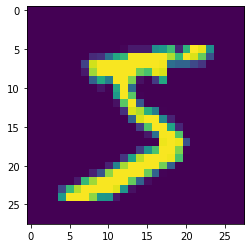

In [13]:
# Plot the data as an image
plt.imshow(img);



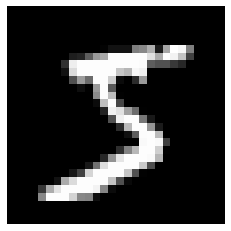

In [15]:
# Plot the data as an image
plt.imshow(img, cmap="gray") # to view image as grayscale add cmap ='gray'
plt.axis("off"); # removing ticks from the axis 



In [16]:
# To filter for rows that are 1's:
idx_1s = y_train == 1
idx_1s.sum()

6742

In [17]:
# Proving we've isolated the 1's
y_train[idx_1s]

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [18]:
# Viewing the image data for 1's
X_train[idx_1s]


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

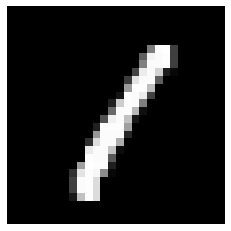

In [19]:
# Visualizing the first "1"
plt.imshow(X_train[idx_1s][0], cmap="gray")
plt.axis("off");


In [20]:
# Getting the list of unique classes
classes = np.unique(y_train)
classes


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

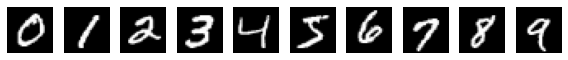

In [21]:
fig, axes = plt.subplots(ncols=10, figsize=(8, 1.5))  

for i, digit in enumerate(classes):
    # Get the axes
    ax = axes[i]
    # Filter for the current digit
    idx_digit = y_train == digit
    # Plot the first example digit
    ax.imshow(X_train[idx_digit][0], cmap="gray")
    ax.axis("off")
fig.tight_layout()


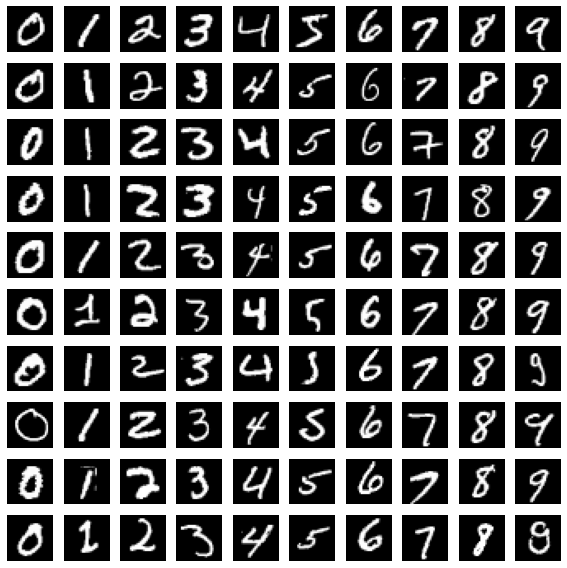

In [22]:
# Plotting 10 examples of each digit
n_example_rows = 10
fig, axes = plt.subplots(ncols=10, nrows=n_example_rows, figsize=(8, 8))
# axes = axes.flatten()x
for row in range(n_example_rows):
    row_axes = axes[row]
    for i, digit in enumerate(classes):
        # Get the axes
        ax = row_axes[i]
        # Filter for the current digit
        idx_digit = y_train == digit
        # Plot the first example digit
        ax.imshow(X_train[idx_digit][row], cmap="gray")
        ax.axis("off")
fig.tight_layout()


In [23]:
# New imports
from tensorflow.keras.preprocessing.image import (array_to_img, img_to_array, load_img, save_img)


In [24]:
# Try to view image with tensorflow
array_to_img(X_train[0])


ValueError: Expected image array to have rank 3 (single image). Got array with shape: (28, 28)

In [25]:
# Viewing shape before reshaping
img.shape

(28, 28)

In [26]:
# Saving the new dimensions of the new shape
new_shape = (*img.shape, 1)
new_shape

(28, 28, 1)

In [27]:
# Reshaping the image
reshaped_img = img.reshape(new_shape)
reshaped_img.shape

(28, 28, 1)

In [28]:
# Show image
array_to_img(reshaped_img)

In [29]:
# Method 2 to reshape the data to view in tensorflow

# Adding extra final dimension  with tf.newaxis
X_train_reshaped_alt = X_train[...,tf.newaxis] # passing ... as first argument adding tf.newaxis to add extra dimention 
X_train_reshaped_alt.shape


(60000, 28, 28, 1)

In [30]:
# Showing first image from reshaped data
img_reshaped_alt = X_train_reshaped_alt[0]
array_to_img(img_reshaped_alt)


### Color images

In [31]:
import requests
url = "https://upload.wikimedia.org/wikipedia/commons/d/d7/RGB_24bits_palette_sample_image.jpg"
resp = requests.get(url)
fname = "example-color-image.png"
with open(fname,'wb') as f:
    f.write(resp.content)

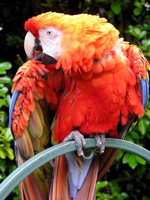

In [32]:
# Loading the file as a PIL Image using tensorflow's load_img
color_img = load_img(fname)
color_img

In [33]:
# Converting the color image to an array
color_img_data= img_to_array(color_img)
color_img_data.shape

(200, 150, 3)

In [34]:
# Viewing the pixel values for the first channel red
channel0 = color_img_data[:,:,0]
channel0.shape

(200, 150)

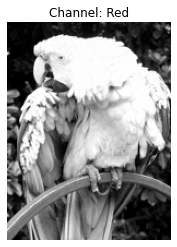

In [35]:
# Plot the red channel
fig, axes = plt.subplots()
axes.imshow(color_img_data[:,:,0], cmap='gray')
axes.set_title("Channel: Red");
axes.axis('off');


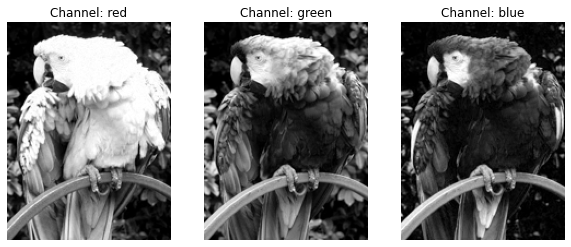

In [36]:
# loop through all 3 colors
fig, axes = plt.subplots(ncols=3, figsize=(10,4))
channels = ['red','green','blue']
for i, channel in enumerate(channels):
    axes[i].imshow(color_img_data[:,:,i], cmap='gray')
    axes[i].set_title(f"Channel: {channel}");
    axes[i].axis('off')

